In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

In [ ]:
# Define your custom dataset directory
train_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
validation_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 331, 331
batch_size = 32

In [ ]:
# Define the NASNetLarge model
base_model = tf.keras.applications.NASNetLarge(input_shape=(img_width, img_height, 3),
                                               include_top=False,
                                               weights='imagenet')

343610240/343610240 [==============================] - 4s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add a custom output layer
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(2, activation='softmax')(x)

In [ ]:
# Combine the base model with the custom output layer
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define the data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 16.5 MB/s eta 0:00:00


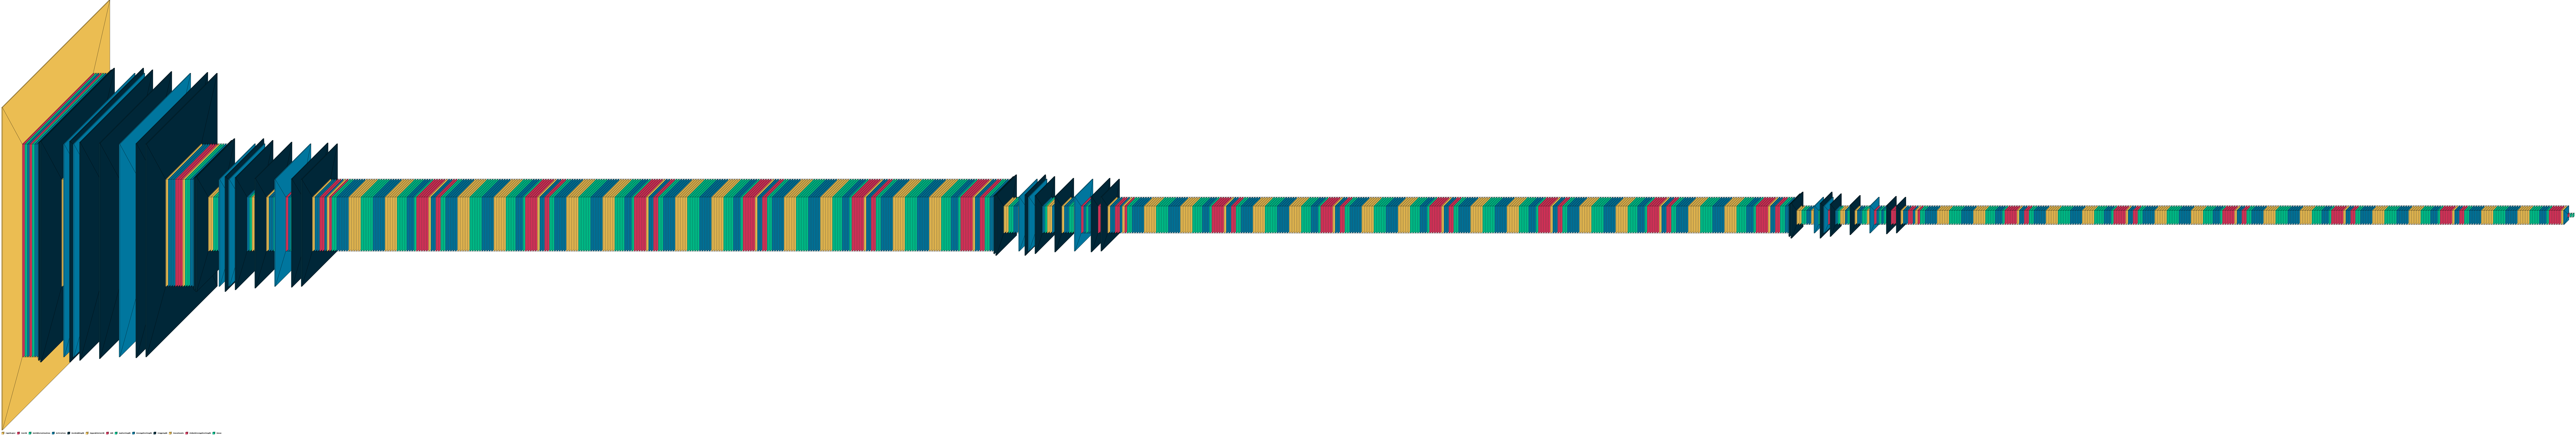

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=5, max_z=5, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model
model.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=10,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)

Epoch 1/10
26/26 [==============================] - 260s 9s/step - loss: 0.7986 - accuracy: 0.6510 - val_loss: 0.3624 - val_accuracy: 0.8687
Epoch 2/10
26/26 [==============================] - 78s 3s/step - loss: 0.4790 - accuracy: 0.7698 - val_loss: 0.4847 - val_accuracy: 0.7688
Epoch 3/10
26/26 [==============================] - 76s 3s/step - loss: 0.3569 - accuracy: 0.8441 - val_loss: 0.3201 - val_accuracy: 0.8562
Epoch 4/10
26/26 [==============================] - 76s 3s/step - loss: 0.3043 - accuracy: 0.8713 - val_loss: 0.3198 - val_accuracy: 0.8500
Epoch 5/10
26/26 [==============================] - 76s 3s/step - loss: 0.2695 - accuracy: 0.8998 - val_loss: 0.3884 - val_accuracy: 0.8062
Epoch 6/10
26/26 [==============================] - 77s 3s/step - loss: 0.2422 - accuracy: 0.9097 - val_loss: 0.5372 - val_accuracy: 0.7625
Epoch 7/10
26/26 [==============================] - 78s 3s/step - loss: 0.1990 - accuracy: 0.9245 - val_loss: 0.4246 - val_accuracy: 0.8125
Epoch 8/10
26/26 [=

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 47s 9s/step - loss: 0.4961 - accuracy: 0.7889


[0.49605438113212585, 0.7888888716697693]

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

6/6 [==============================] - 8s 1s/step - loss: 0.4961 - accuracy: 0.7889
Test Loss: 0.4960543215274811
Test Accuracy: 0.7888888716697693


In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_acc)

6/6 [==============================] - 9s 1s/step - loss: 0.5133 - accuracy: 0.7944
Validation Loss: 0.5132933855056763
Validation Accuracy: 0.7944444417953491


In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 8s 1s/step - loss: 0.4961 - accuracy: 0.7889


[0.49605438113212585, 0.7888888716697693]

In [ ]:
# Save the model
#model.save('nasnet_large_custom.h5')